<a href="https://colab.research.google.com/github/Omarouteix/PUC/blob/main/test2_christianmata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('/content/vessels_train_GT.tif') # read image using imread function

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

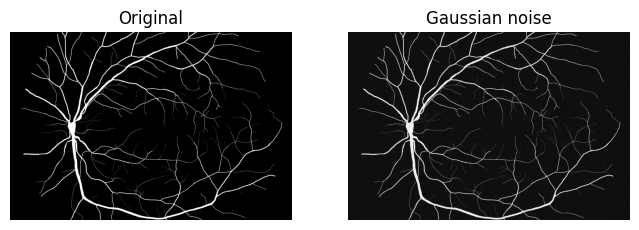

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise

def plot_comparison(original, modified, title):
    """
    Plots the original and modified images side-by-side for comparison.

    Args:
        original: The original image.
        modified: The modified image.
        title: The title of the plot.
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap=plt.cm.gray)
    ax2.set_title(title)
    ax2.axis('off')
    plt.show()

sigma = 0.15
noisy_image_normal = random_noise(I, var=sigma**2)

plot_comparison(I,noisy_image_normal,'Gaussian noise')

uint8
0 255


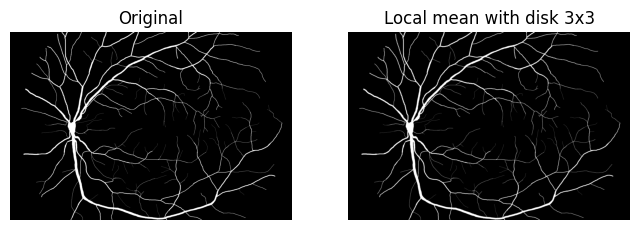

<Figure size 640x480 with 0 Axes>

In [ ]:
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.morphology import disk

img = sk.img_as_ubyte(I)

# Verificar el formato de la imagen
print(img.dtype)  # Debería ser uint8
print(img.min(), img.max())  # Deberían estar entre 0 y 255


footprint = disk(3) # structuring element
img_locmed = rank.mean(img, footprint=footprint)
plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
I = sk.io.imread('/content/dog_image.jpg') # read image using imread function
img = rgb2gray(I)


ValueError: cannot reshape array of size 27000 into shape (300,300)

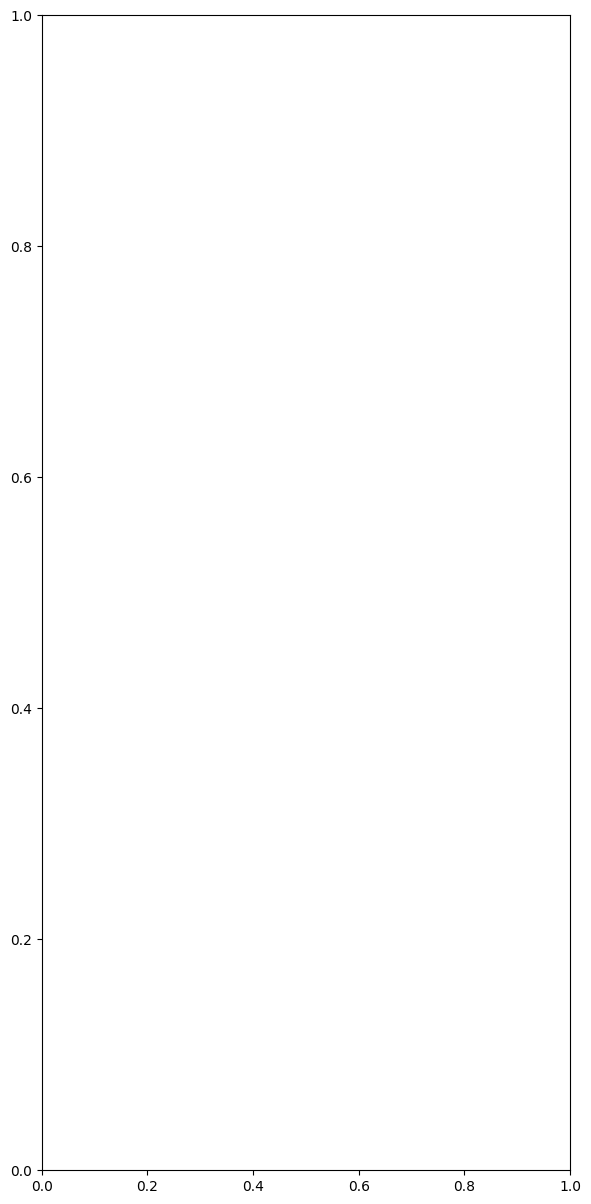

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.color import rgb2gray

I = sk.io.imread('/content/dog_image.jpg') # read image using imread function
img = rgb2gray(I)

X = img.reshape(-1, 1)  # Reshape for KMeans if necessary
y = np.zeros(X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

v_I_train = img.reshape(img.shape[0] * img.shape[1], 1).astype(np.uint8)

kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

v_I_test = X_test.reshape(X_test.shape[0], 1).astype(np.uint8) # reshape image as 1d array


v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
# Reshape using X_test shape to match the test data
I_kmeans = np.array(v_kmeans).reshape(X_test.shape[0], 1).astype(np.uint8) # Shape back result as image


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
# Display the original image from the test set
ax1.imshow(X_test.reshape(img.shape), cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
# Display the segmented image using test set shape
ax2.imshow(I_kmeans.reshape(X_test.reshape(img.shape).shape), cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


iregion = 0

entropy = np.zeros(len(props))

for p in props:
    minr, minc, maxr, maxc = p.bbox
    # Get the region from IG using bounding box coordinates
    region = IG[minc:maxc, minr:maxr]

    v = region.flatten()  # Flatten the region for histogram calculation
    # Probability of occurrence of each grayscale level
    probg, edges = np.histogram(v, bins=np.arange(256), density=True)

    eps = 1e-16
    probg = probg + eps

    H = -np.sum(probg * np.log2(probg), axis=0)  # Compute Shannon's entropy
    entropy[iregion] = H  # Store entropy for the current region
    iregion = iregion + 1

print('Entropy of the objects: {}'.format(entropy))

NameError: name 'props' is not defined

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?